In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.environment import prepare_trading_env
from src.utils import load_config, evaluate_episode, display_env
from src.optimize import make_eval_callback

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

In [3]:
cfg_env = load_config("./config/config-env.yaml")

In [4]:
env_train, env_test = prepare_trading_env(cfg_env) 

[*********************100%***********************]  1 of 1 completed


info: {'total_reward': 15.610008239746094, 'total_profit': 0.7320654550300965, 'position': 0}


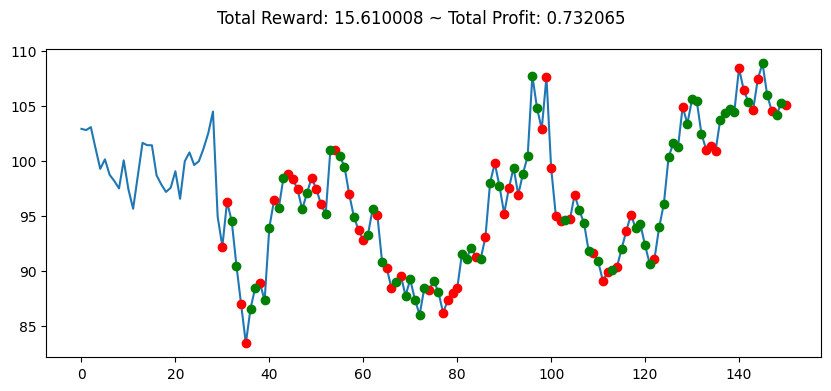

In [5]:
evaluate_episode(env_test)
display_env(env_test)

In [25]:
env_train_maker = lambda: env_train
env_test_maker = lambda: env_test

# vectorize environment to pass it to the sb model
env_train_vec = DummyVecEnv(env_fns=[env_train_maker]) 
env_test_vec = DummyVecEnv(env_fns=[env_test_maker])

In [27]:
cfg = load_config(f"./config/config-model.yaml")

In [28]:
model_type = "ppo"
cfg_model = cfg[model_type]

if model_type == "a2c": 
    model = A2C
elif model_type == "ppo": 
    model = PPO

model = model(env=env_train_vec, **cfg_model)

Using cpu device


c:\Users\pemma\OneDrive - GENES\Ensae\S2\RL\Project\rlsb-trading\env\lib\site-packages\stable_baselines3\ppo\ppo.py:148: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 5`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 5
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5 and n_envs=1)
  warnings.warn(


In [29]:
cfg_optim = cfg["optim"]
eval_callback = make_eval_callback(env_test_vec, cfg_optim)

model.learn(total_timesteps=cfg_optim["total_timesteps"], callback=eval_callback, progress_bar=True)

Output()

---------------------------
| time/              |    |
|    fps             | 56 |
|    iterations      | 1  |
|    time_elapsed    | 0  |
|    total_timesteps | 5  |
---------------------------


c:\Users\pemma\OneDrive - 
GENES\Ensae\S2\RL\Project\rlsb-trading\env\lib\site-packages\stable_baselines3\common\evaluation.py:67: 
UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting 
modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first
with ``Monitor`` wrapper.
  warnings.warn(

Eval num_timesteps=10, episode_reward=0.00 +/- 0.00

Episode length: 120.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 120          |
|    mean_reward          | 0            |
| time/                   |              |
|    total_timesteps      | 10           |
| train/                  |              |
|    approx_kl            | 0.0047345995 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.691       |
|    explained_variance   | 0.0255       |
|    learning_rate        | 0.0007       |
|    loss                 | 0.133        |
|    n_updates            | 5            |
|    policy_gradient_loss | -0.00881     |
|    value_loss           | 0.495        |
------------------------------------------


New best mean reward!

---------------------------
| time/              |    |
|    fps             | 7  |
|    iterations      | 2  |
|    time_elapsed    | 1  |
|    total_timesteps | 10 |
---------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 10           |
|    iterations           | 3            |
|    time_elapsed         | 1            |
|    total_timesteps      | 15           |
| train/                  |              |
|    approx_kl            | 0.0033763647 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.681       |
|    explained_variance   | 0.441        |
|    learning_rate        | 0.0007       |
|    loss                 | 0.287        |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00308     |
|    value_loss           | 1.26         |
------------------------------------------


Eval num_timesteps=20, episode_reward=0.00 +/- 0.00

Episode length: 120.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 120          |
|    mean_reward          | 0            |
| time/                   |              |
|    total_timesteps      | 20           |
| train/                  |              |
|    approx_kl            | 0.0055867434 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.66        |
|    explained_variance   | -43.7        |
|    learning_rate        | 0.0007       |
|    loss                 | 0.104        |
|    n_updates            | 15           |
|    policy_gradient_loss | -0.0402      |
|    value_loss           | 0.273        |
------------------------------------------
---------------------------
| time/              |    |
|    fps             | 7  |
|    iterations      | 4  |
|    time_elapsed    | 2  |
|    total_timesteps | 20 |
---------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 8           |
|    iterations           | 5           |
|    time_elapsed         | 2           |
|    total_timesteps      | 25          |
| train/                  |             |
|    approx_kl            | 0.004980856 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.618      |
|    explained_variance   | -0.00896    |
|    learning_rate        | 0.0007      |
|    loss                 | 1.35        |
|    n_updates            | 20          |
|    policy_gradient_loss | 0.00965     |
|    value_loss           | 3.73        |
-----------------------------------------


Eval num_timesteps=30, episode_reward=0.00 +/- 0.00

Episode length: 120.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 120          |
|    mean_reward          | 0            |
| time/                   |              |
|    total_timesteps      | 30           |
| train/                  |              |
|    approx_kl            | 0.0015359998 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.586       |
|    explained_variance   | -0.163       |
|    learning_rate        | 0.0007       |
|    loss                 | 0.62         |
|    n_updates            | 25           |
|    policy_gradient_loss | -0.00118     |
|    value_loss           | 1.96         |
------------------------------------------
---------------------------
| time/              |    |
|    fps             | 7  |
|    iterations      | 6  |
|    time_elapsed    | 4  |
|    total_timesteps | 30 |
---------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 8             |
|    iterations           | 7             |
|    time_elapsed         | 4             |
|    total_timesteps      | 35            |
| train/                  |               |
|    approx_kl            | 9.7370146e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.56         |
|    explained_variance   | -0.283        |
|    learning_rate        | 0.0007        |
|    loss                 | 0.189         |
|    n_updates            | 30            |
|    policy_gradient_loss | 0.000207      |
|    value_loss           | 0.295         |
-------------------------------------------


Eval num_timesteps=40, episode_reward=0.00 +/- 0.00

Episode length: 120.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 120           |
|    mean_reward          | 0             |
| time/                   |               |
|    total_timesteps      | 40            |
| train/                  |               |
|    approx_kl            | 1.3947487e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.552        |
|    explained_variance   | -4.94         |
|    learning_rate        | 0.0007        |
|    loss                 | 0.0106        |
|    n_updates            | 35            |
|    policy_gradient_loss | -0.000324     |
|    value_loss           | 0.0306        |
-------------------------------------------
---------------------------
| time/              |    |
|    fps             | 7  |
|    iterations      | 8  |
|    time_elapsed    | 5  |
|    total_timesteps | 40 |
---------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 8             |
|    iterations           | 9             |
|    time_elapsed         | 5             |
|    total_timesteps      | 45            |
| train/                  |               |
|    approx_kl            | 1.0788441e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.563        |
|    explained_variance   | -0.463        |
|    learning_rate        | 0.0007        |
|    loss                 | 0.00144       |
|    n_updates            | 40            |
|    policy_gradient_loss | -0.0011       |
|    value_loss           | 0.00925       |
-------------------------------------------


Eval num_timesteps=50, episode_reward=0.00 +/- 0.00

Episode length: 120.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 120          |
|    mean_reward          | 0            |
| time/                   |              |
|    total_timesteps      | 50           |
| train/                  |              |
|    approx_kl            | 4.322529e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.577       |
|    explained_variance   | -5           |
|    learning_rate        | 0.0007       |
|    loss                 | 0.00598      |
|    n_updates            | 45           |
|    policy_gradient_loss | -0.00048     |
|    value_loss           | 0.0493       |
------------------------------------------
---------------------------
| time/              |    |
|    fps             | 7  |
|    iterations      | 10 |
|    time_elapsed    | 6  |
|    total_timesteps | 50 |
---------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 8            |
|    iterations           | 11           |
|    time_elapsed         | 6            |
|    total_timesteps      | 55           |
| train/                  |              |
|    approx_kl            | 0.0014618874 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.59        |
|    explained_variance   | 0.0214       |
|    learning_rate        | 0.0007       |
|    loss                 | 0.186        |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.011       |
|    value_loss           | 0.527        |
------------------------------------------


Eval num_timesteps=60, episode_reward=0.00 +/- 0.00

Episode length: 120.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 120          |
|    mean_reward          | 0            |
| time/                   |              |
|    total_timesteps      | 60           |
| train/                  |              |
|    approx_kl            | 0.0010410845 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.561       |
|    explained_variance   | -0.324       |
|    learning_rate        | 0.0007       |
|    loss                 | 0.00868      |
|    n_updates            | 55           |
|    policy_gradient_loss | -0.000446    |
|    value_loss           | 0.0392       |
------------------------------------------
---------------------------
| time/              |    |
|    fps             | 7  |
|    iterations      | 12 |
|    time_elapsed    | 7  |
|    total_timesteps | 60 |
---------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 8            |
|    iterations           | 13           |
|    time_elapsed         | 7            |
|    total_timesteps      | 65           |
| train/                  |              |
|    approx_kl            | 0.0010225773 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.535       |
|    explained_variance   | 0.0114       |
|    learning_rate        | 0.0007       |
|    loss                 | 2.56         |
|    n_updates            | 60           |
|    policy_gradient_loss | 0.0035       |
|    value_loss           | 5.31         |
------------------------------------------


Eval num_timesteps=70, episode_reward=0.00 +/- 0.00

Episode length: 120.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 120           |
|    mean_reward          | 0             |
| time/                   |               |
|    total_timesteps      | 70            |
| train/                  |               |
|    approx_kl            | 2.1135807e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.509        |
|    explained_variance   | 0.815         |
|    learning_rate        | 0.0007        |
|    loss                 | 0.00317       |
|    n_updates            | 65            |
|    policy_gradient_loss | -0.000608     |
|    value_loss           | 0.0251        |
-------------------------------------------
---------------------------
| time/              |    |
|    fps             | 8  |
|    iterations      | 14 |
|    time_elapsed    | 8  |
|    total_timesteps | 70 |
---------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 8            |
|    iterations           | 15           |
|    time_elapsed         | 8            |
|    total_timesteps      | 75           |
| train/                  |              |
|    approx_kl            | 2.849102e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.489       |
|    explained_variance   | -0.519       |
|    learning_rate        | 0.0007       |
|    loss                 | 0.00451      |
|    n_updates            | 70           |
|    policy_gradient_loss | -5.44e-05    |
|    value_loss           | 0.0154       |
------------------------------------------


Eval num_timesteps=80, episode_reward=0.00 +/- 0.00

Episode length: 120.00 +/- 0.00

-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 120           |
|    mean_reward          | 0             |
| time/                   |               |
|    total_timesteps      | 80            |
| train/                  |               |
|    approx_kl            | 1.9288063e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.47         |
|    explained_variance   | -1.7          |
|    learning_rate        | 0.0007        |
|    loss                 | 0.0138        |
|    n_updates            | 75            |
|    policy_gradient_loss | -2.74e-05     |
|    value_loss           | 0.0518        |
-------------------------------------------
---------------------------
| time/              |    |
|    fps             | 8  |
|    iterations      | 16 |
|    time_elapsed    | 9  |
|    total_timesteps | 80 |
---------------------------


-------------------------------------------
| time/                   |               |
|    fps                  | 8             |
|    iterations           | 17            |
|    time_elapsed         | 9             |
|    total_timesteps      | 85            |
| train/                  |               |
|    approx_kl            | 4.0316583e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.482        |
|    explained_variance   | -1.15         |
|    learning_rate        | 0.0007        |
|    loss                 | 0.0176        |
|    n_updates            | 80            |
|    policy_gradient_loss | -0.00142      |
|    value_loss           | 0.0258        |
-------------------------------------------


Eval num_timesteps=90, episode_reward=0.00 +/- 0.00

Episode length: 120.00 +/- 0.00

---------------------------
| time/              |    |
|    fps             | 8  |
|    iterations      | 18 |
|    time_elapsed    | 10 |
|    total_timesteps | 90 |
---------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 8            |
|    iterations           | 19           |
|    time_elapsed         | 10           |
|    total_timesteps      | 95           |
| train/                  |              |
|    approx_kl            | 0.0003901124 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.49        |
|    explained_variance   | -0.012       |
|    learning_rate        | 0.0007       |
|    loss                 | 15.8         |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.00318     |
|    value_loss           | 34           |
------------------------------------------


Eval num_timesteps=100, episode_reward=0.00 +/- 0.00

Episode length: 120.00 +/- 0.00

------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 120          |
|    mean_reward          | 0            |
| time/                   |              |
|    total_timesteps      | 100          |
| train/                  |              |
|    approx_kl            | 0.0007513642 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.501       |
|    explained_variance   | 0.0429       |
|    learning_rate        | 0.0007       |
|    loss                 | 1.88         |
|    n_updates            | 95           |
|    policy_gradient_loss | -0.0136      |
|    value_loss           | 3.85         |
------------------------------------------
----------------------------
| time/              |     |
|    fps             | 8   |
|    iterations      | 20  |
|    time_elapsed    | 12  |
|    total_timesteps | 100 |
----------------------------


info: {'total_reward': 0.510009765625, 'total_profit': 0.6764062121078284, 'position': 1}


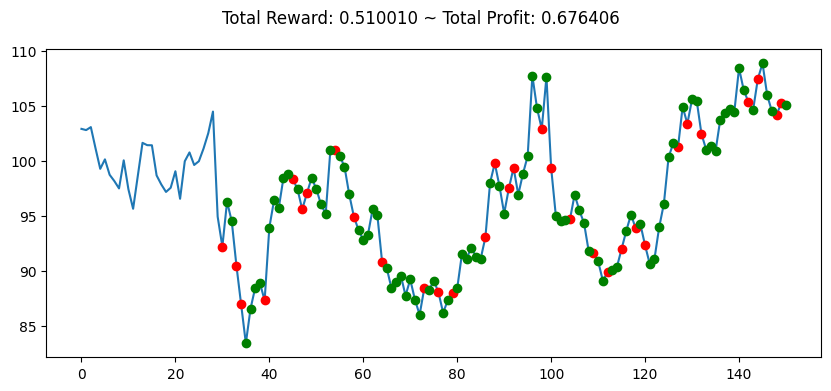

In [30]:
env = env_test_maker()

evaluate_episode(env, model)
display_env(env); 